piccolo set di funzioni per disegnare grafico strutturale di file hdf5

In [12]:
include("../../codice/julia/hdf5 tree.jl")
include("../../codice/julia/HDF5filesDict.jl")#todo: filesdict generico, gli passi anche la fun open alla creaz
include("../../codice/julia/printHDF.jl")
include("../../codice/julia/drawTree.jl")
using HDF5
using DataFrames

1. creiamo strutt per tener lista file aperti

In [4]:
openfiles = HDF5fd.filesDict()

Main.HDF5fd.filesDict(Dict{Any,Any}(), 0)

2. apriamo file hdf5

In [14]:
testfile="../../prisma/hdf5/data/PRS_L2D_STD_20200627102334_20200627102339_0001.he5"
file = HDF5fd.open(openfiles,testfile,"r")

HDF5 data file: ../../prisma/hdf5/data/PRS_L2D_STD_20200627102334_20200627102339_0001.he5

3. leggiamo gerarchia hdf5 object del file e lo convertiamo in una struttura ad albero

In [15]:
mytree = HDF5Tree.viewfileTree(file);

init addchild Acquisition_Purpose
init addchild Acquisition_Size
init addchild Acquisition_Station
init addchild Acquisition_Type
init addchild Atm_LutGeomInfo_RelativeAzimuth
init addchild Atm_LutGeomInfo_SunZenith
init addchild Atm_LutGeomInfo_ViewZenith
init addchild Atm_Lut_version
init addchild Atmo_RTM_info
init addchild Atmo_profile_info
init addchild Aux_SunEarthDistance
init addchild Aux_SunIrradiance
init addchild CNM_L2_BINNING
init addchild CNM_L2_BIN_ON
init addchild CNM_L2_BSEL_ON
init addchild CNM_L2_HGRP
init addchild CNM_PAN_ACQ
init addchild CNM_SWIR_ACQ
init addchild CNM_SWIR_SELECT
init addchild CNM_VNIR_ACQ
init addchild CNM_VNIR_SELECT
init addchild Cloudy_pixels_percentage
init addchild DEM_info
init addchild Epsg_Code
init addchild Exit_Code
init addchild Frame_Type
init addchild GCP_info
init addchild ISF_ID_Start
init addchild Image_ID
init addchild Integration_Time
init addchild L1_Processor_Version
init addchild L1_Quality_CCPerc
init addchild L2ScalePanMax


4. possiamo chiudere il file

In [16]:
HDF5fd.closeall(openfiles)

chiuso 1 file


5. convertiamo l'albero in un df

In [17]:
mydf, counter = HDF5Tree.treeToDf(mytree);

6. disegniamo il df

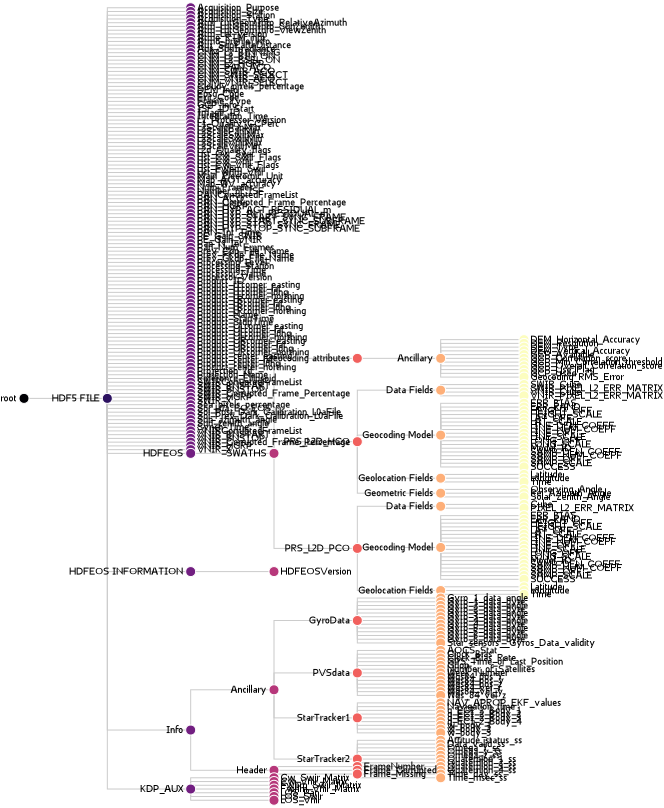

In [18]:
drawTree.drawtree(mydf)
#=todo: 
zoom?
legenda colore<- tipo. 
    (eg: gruppi blu, attributi verde, dataset giallo, etc) 
    => aggiungi colonna al df, enum del tipo
    => nella macro vgplot, mappa tipo a colore

=#